# LSTM


Pour approfondir vos connaissances sur les LSTM:
* https://colah.github.io/posts/2015-08-Understanding-LSTMs/
* https://github.com/omerbsezer/LSTM_RNN_Tutorials_with_Demo


In [1]:
# LSTM for France Weather problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [14]:
dataframe = read_csv('/content/drive/My Drive/IA School/Deep learning/temperature-quotidienne-regionale.csv',sep=';')
d=dataframe.drop(columns=['Date','Code INSEE région','Région','TMin (°C)','TMax (°C)'], axis=1)
df

,TMoy (°C)
0,0.24
1,3.58
2,5.83
3,10.98
4,5.28
...,...
19573,4.68
19574,4.38
19575,8.88
19576,7.01


In [0]:
dataset=df

In [0]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [21]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/20
 - 17s - loss: 0.0204
Epoch 2/20
 - 17s - loss: 0.0177
Epoch 3/20
 - 17s - loss: 0.0177
Epoch 4/20
 - 17s - loss: 0.0177
Epoch 5/20
 - 17s - loss: 0.0177
Epoch 6/20
 - 17s - loss: 0.0177
Epoch 7/20
 - 17s - loss: 0.0177
Epoch 8/20
 - 17s - loss: 0.0177
Epoch 9/20
 - 17s - loss: 0.0177
Epoch 10/20
 - 17s - loss: 0.0176
Epoch 11/20
 - 16s - loss: 0.0177
Epoch 12/20
 - 16s - loss: 0.0177
Epoch 13/20
 - 17s - loss: 0.0177
Epoch 14/20
 - 17s - loss: 0.0176
Epoch 15/20
 - 16s - loss: 0.0176
Epoch 16/20
 - 16s - loss: 0.0176
Epoch 17/20
 - 16s - loss: 0.0176
Epoch 18/20
 - 18s - loss: 0.0177
Epoch 19/20
 - 17s - loss: 0.0176
Epoch 20/20
 - 17s - loss: 0.0176


In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.18 RMSE
Test Score: 6.41 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


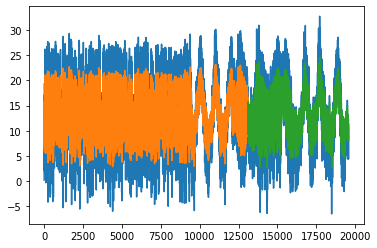

In [26]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()